In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = '大三下cv'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

import os
os.chdir('/content/drive/My Drive/{}/cv_mid_project-main'.format(FOLDERNAME))

Mounted at /content/drive


In [2]:
import torch
import torch.nn as nn
import torch.utils.data as Data

from cityscape_dataset.dataset import CityscapeDataset

img_root =  r'/content/drive/My Drive/大三下cv/leftImg8bit_trainvaltest/train'
target_root = r'/content/drive/My Drive/大三下cv/gtFine_trainvaltest/train'

In [3]:
from train import train

In [4]:
##########################################
## Modify the configurations here! ##
##########################################

train_img_root =  r'/content/drive/My Drive/大三下cv/leftImg8bit_trainvaltest/train'
train_target_root = r'/content/drive/My Drive/大三下cv/gtFine_trainvaltest/train'
val_img_root = r'/content/drive/My Drive/大三下cv/leftImg8bit_trainvaltest/train'
val_target_root = r'/content/drive/My Drive/大三下cv/gtFine_trainvaltest/train'
epoch_num = 1
batch_size = 2
learning_rate = 1e-3
output_path = 'pretrained/model'
gpu_index = None
pretrained_model = 'pretrained/model'

Net = train(
    train_img_root,
    train_target_root,
    val_img_root,
    val_target_root,
    epoch_num,
    batch_size,
    learning_rate,
    output_path,
    gpu_index,
    pretrained_model
)

Data loaded: 3 train images and 3 validation images
----------------------------
Epoch=  0	Train_loss=3.6304	IoU=0.00	Acc=0.02
Best Epoch:  0  Best mIoU:  0
Time: 32.35(Total: 32.35)


In [5]:
train_data_set = CityscapeDataset(img_root, target_root, train = True, test = False)
train_data_loader = Data.DataLoader(dataset=train_data_set, batch_size=1, shuffle=True)
for step, (batch_x, batch_y) in enumerate(train_data_loader):
    print(batch_x.shape, batch_y.shape)

torch.Size([1, 3, 1024, 2048]) torch.Size([1, 1024, 2048])
torch.Size([1, 3, 1024, 2048]) torch.Size([1, 1024, 2048])
torch.Size([1, 3, 1024, 2048]) torch.Size([1, 1024, 2048])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Net.eval()
pred = Net(batch_x.to(0))
label_pred = pred.cpu().detach().numpy().argmax(axis=1)
label = batch_y.numpy()
label_pred.shape, label.shape

((1, 1024, 2048), (1, 1024, 2048))

In [ ]:
PALETTE = [[128, 64, 128], [244, 35, 232], [70, 70, 70], [102, 102, 156],
               [190, 153, 153], [153, 153, 153], [250, 170, 30], [220, 220, 0],
               [107, 142, 35], [152, 251, 152], [70, 130, 180], [220, 20, 60],
               [255, 0, 0], [0, 0, 142], [0, 0, 70], [0, 60, 100],
               [0, 80, 100], [0, 0, 230], [119, 11, 32]]

MY_PALETTE = np.array(PALETTE + PALETTE[:15])
MY_PALETTE[19:] = 255 - MY_PALETTE[19:]

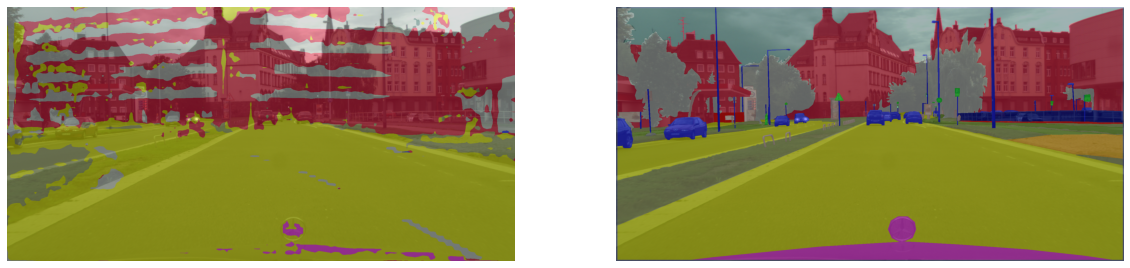

In [ ]:
from PIL import Image
img = Image.open(r'/content/drive/My Drive/大三下cv/leftImg8bit_trainvaltest/train/aachen/aachen_000001_000019_leftImg8bit.png')

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.imshow(MY_PALETTE[label_pred[0]], alpha=0.5)
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(img)
plt.imshow(MY_PALETTE[label[0]], alpha=0.5)
plt.axis(False)

plt.show()

# Test memory

In [ ]:
from SETR.model import Net

In [7]:
#SETRNet = Net(256, 34).to(0)
Net.encoder(batch_x.to(0))

RuntimeError: ignored

In [8]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# Testing save

In [11]:
torch.save(Net.state_dict(), 'pretrained/model')

In [12]:
Net.load_state_dict(torch.load('pretrained/model'))

<All keys matched successfully>